In [60]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from utils import *

In [2]:
train_df = load_train_csv("train.csv")

606 train images - 73585 annotations
Columns : ['id' 'annotation' 'cell_type' 'sample_id']


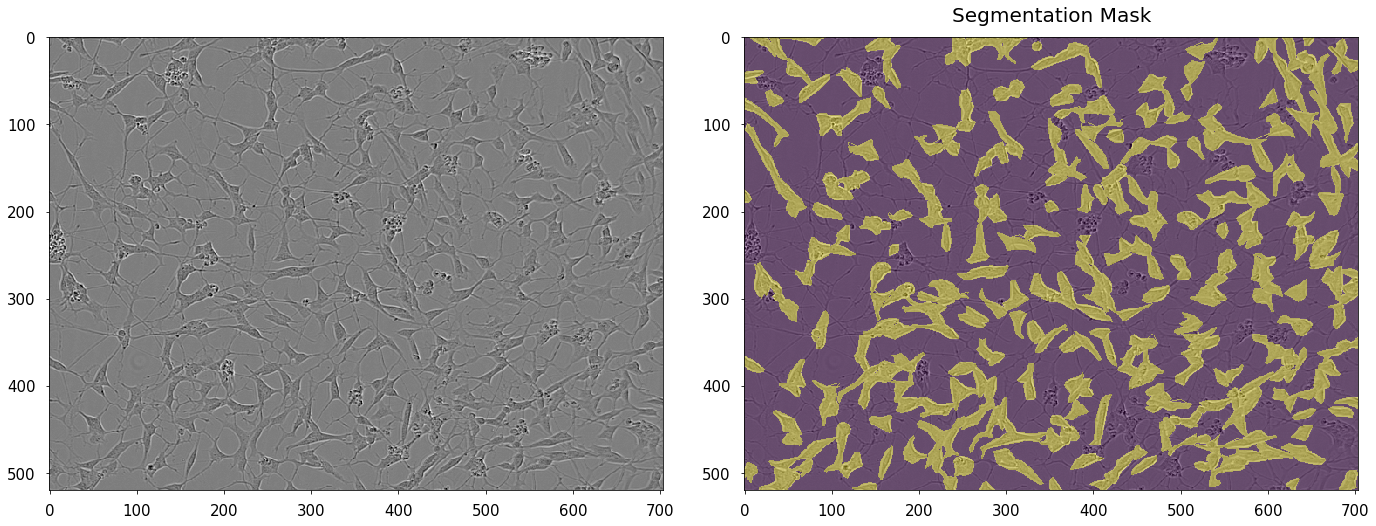

In [3]:
visualize_image_id(df=train_df, image_id=train_df['id'][0])

In [4]:
coco_val = get_coco('./LIVECell_dataset_2021/annotations/LIVECell_single_cells/shsy5y/livecell_shsy5y_val.json')

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [5]:
img_id = coco_val.getImgIds()[10]
img_path = os.path.join('LIVECell_dataset_2021', 'images', 'livecell_train_val_images', 'SHSY5Y', coco_val.imgs[img_id]['file_name'])
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

In [6]:
mask = decode_coco_annotation_to_mask(coco_val, img_id)

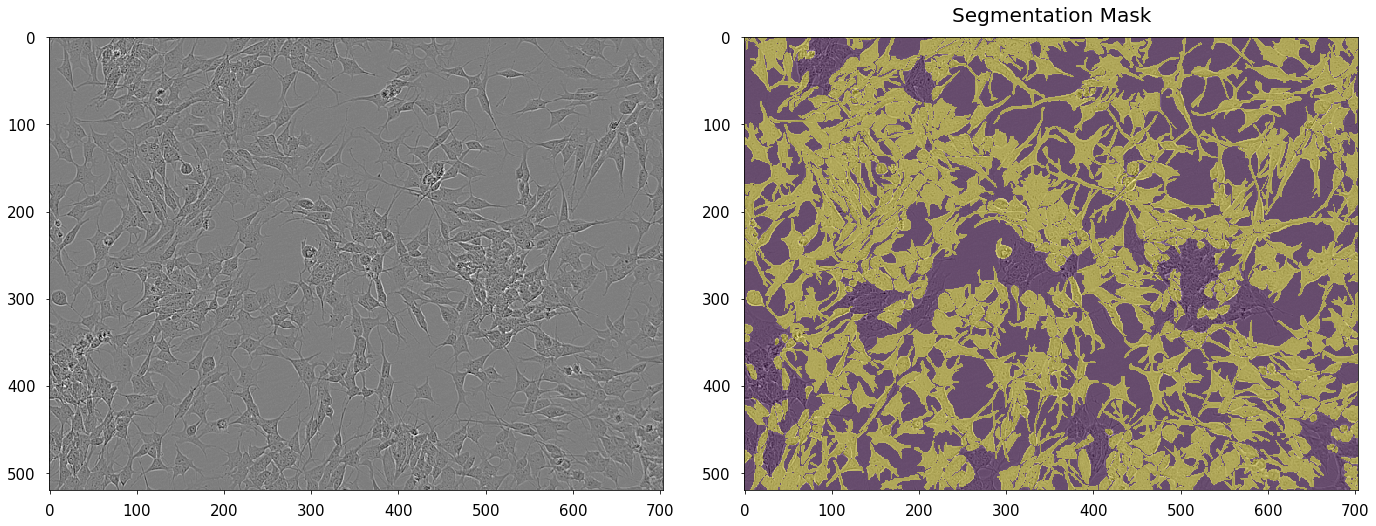

In [7]:
visualize_image_with_mask(img, mask)

In [20]:
def visualize_image_mask_augmentation(image, mask, aug, aug_title):
    fig, axes = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
    fig.tight_layout(pad=5.0)

    axes[0][0].imshow(image, cmap='gray')
    axes[0][1].imshow(image, cmap='gray')
    axes[0][1].imshow(mask, alpha=0.4)
    
    axes[1][0].imshow(image, cmap='gray')
    axes[1][1].imshow(aug, cmap='gray')
    axes[1][1].imshow(mask, alpha=0.4)
    

    for i in range(2):
        for j in range(2):
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].tick_params(axis='x', labelsize=15, pad=10)
            axes[i][j].tick_params(axis='y', labelsize=15, pad=10)

    # axes[0].set_title(f'{image_path} - {cell_type} - {int(annotation_count)}', fontsize=20, pad=15)
    axes[0][1].set_title('Segmentation Mask', fontsize=20, pad=15)
    axes[1][1].set_title(aug_title, fontsize=20, pad=15)
    plt.show()
    plt.close(fig)

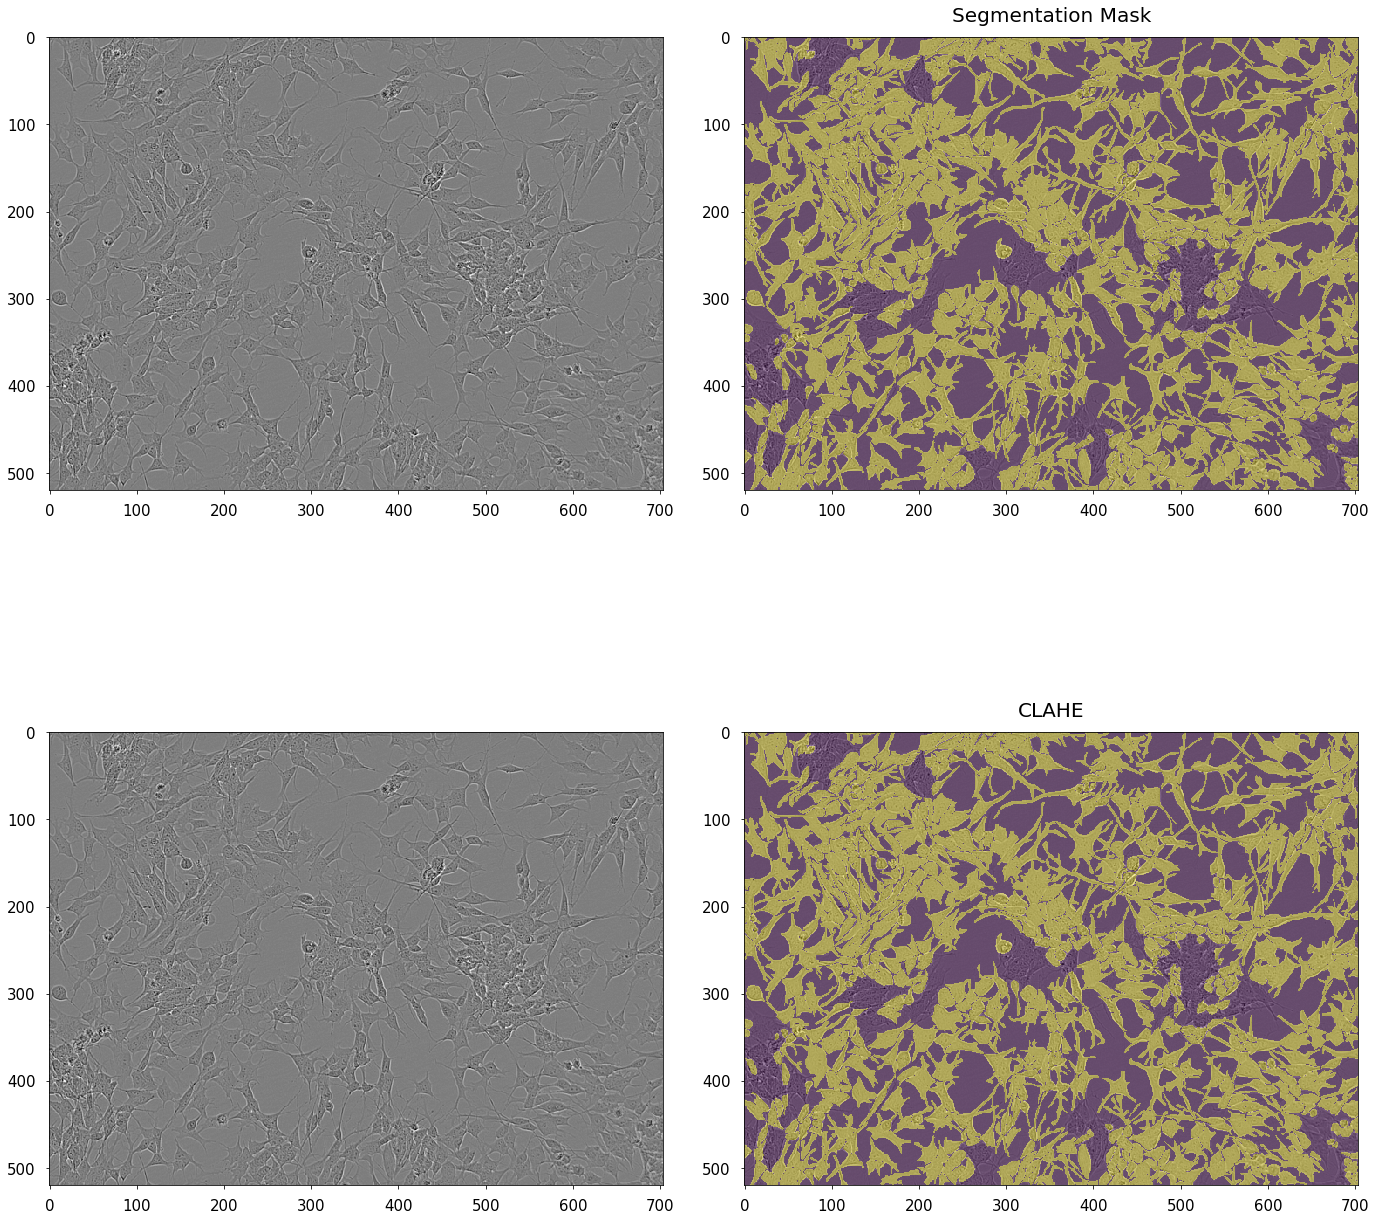

In [22]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(16, 16))
visualize_image_mask_augmentation(img, mask, preprocess(img), 'CLAHE')

In [18]:
clahe.apply(img)

array([[199,  49,  84, ..., 211,  86,  96],
       [112,  58,  64, ..., 147, 117,  61],
       [195, 191, 112, ...,  77, 127,  42],
       ...,
       [ 83, 167, 138, ...,  26,  91, 154],
       [138, 147, 128, ..., 167,  41,  79],
       [138, 147, 128, ..., 237, 186, 128]], dtype=uint8)

In [16]:
def get_CLAHE(clipLimit=10.0, tileGridSize=(16, 16)):
    return cv2.createCLAHE(clipLimit, tileGridSize).apply

In [17]:
def preprocess(img, func=None):
    if func is None:
        return img
    return func(img)

In [48]:
class TrainHistory:
    """
    Record model trainning history
    """
    def __init__(self):
        self.accuracy = []
        self.loss = []
        self.val_accuracy = []
        self.epochs = 0

    def add(self, history):
        """

        :param history: keras.model.fit().history
        :return:
        """
        self.accuracy += history['accuracy']
        self.loss += history['loss']
        self.val_accuracy += history['val_accuracy']
        self.epochs = len(self.accuracy)

    def train_history_plot(self, title="", converge=0.0):
        """

        :param title: The title for the plot
        :param converge: The converge validation accuracy, plot a horizontal line
        :return:
        """
        fig = plt.figure()
        ax = fig.add_subplot(111)

        plt.xlim(1, self.epochs, 1)
        x = range(1, self.epochs + 1, 1)

        acc_curve, = ax.plot(x, self.accuracy, '-k', linewidth=1, color='r')
        ax.scatter(x, self.accuracy, s=60, c='r', marker = '+')
        val_acc_curve, = ax.plot(x, self.val_accuracy, '--k', linewidth=1, color='b')
        ax.scatter(x, self.val_accuracy, s=60, c='b', marker = '*')

        ax2 = ax.twinx()
        loss_curve, = ax2.plot(x, self.loss, 'k', linewidth=1, color='g')
        ax.scatter(x, self.loss, s=60, c='g', marker = '.')

        if title:
            plt.title(title)
        ax.set_ylabel('Accuracy')
        ax2.set_ylabel('Loss')
        ax.set_xlabel('Iteration')
        if converge > 0.0:
            ax.hlines(converge, 1, self.epochs, colors="y", linestyles="dashed")

        plt.legend(handles=[acc_curve, val_acc_curve, loss_curve], labels=['train acc', 'val acc', 'train loss'],
                   loc='lower right')

        plt.show()

    def to_file(self, file_path):
        with open(file_path, 'w') as f:
            f.write(','.join([str(ele) for ele in self.accuracy]))
            f.write('\n')
            f.write(','.join([str(ele) for ele in self.loss]))
            f.write('\n')
            f.write(','.join([str(ele) for ele in self.val_accuracy]))

In [49]:
history = {'accuracy' : [0.8,0.9,0.95],
           'loss' : [1, 0.5, 0.4],
           'val_accuracy' : [0.7, 0.8, 0.9]}

his = TrainHistory()

In [52]:
his.add(history)

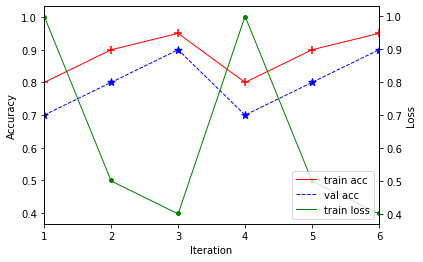

In [53]:
his.train_history_plot()

In [54]:
his.to_file('history.txt')

In [58]:
img = cv2.cvtColor(cv2.imread('train_reorganize/shsy5y/SHSY5Y_Phase_B10_1_03d04h00m_1.png'), cv2.COLOR_BGR2GRAY)
mask = cv2.cvtColor(cv2.imread('train_reorganize/annotation/shsy5y/SHSY5Y_Phase_B10_1_03d04h00m_1.png'), cv2.COLOR_BGR2GRAY)

In [59]:
mask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)